In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## Model Selection 모듈

## 사이킷런 model_selection 모듈의 주요 기능
- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증을 위한 분할 및 평가
- Estimator의 하이퍼파라미터 튜닝

**학습 데이터와 테스트 데이터 세트 분리**
- train_test_split() 함수 사용

**학습 데이터 세트**
- 머신러닝 알고리즘의 학습을 위해 사용
- 데이터의 속성(피처)과 결정값(레이블) 모두 포함
- 학습 데이터를 기반으로 머신러닝 알고리즘이 데이터 속성과 결정값의 패턴을 인지하고 학습

**테스트 데이터 세트** 
- 학습된 머신러닝 알고리즘 테스트용
- 머신러닝 알고리즘은 제공된 속성 데이터를 기반으로 결정값 예측
- 학습 데이터와 별도의 세트로 제공


**train_test_split() 함수**

train_test_split(feature_dataset, label_dataset, test_size, train_size, random_state, shuffle, stratify)


- feature_dataset : 피처 데이터 세트
    - 피처(feature)만으로 된 데이터(numpy) [5.1, 3.5, 1.4, 0.2],...
- label_dataset : 레이블 데이터 세트
    - 레이블(결정 값) 데이터(numpy) [0 0 0 ... 1 1 1 .... 2 2 2]
- test_size : 테스트 데이터 세트 비율
    - 전체 데이터 세트 중 테스트 데이터 세트 비율
    - 지정하지 않으면 0.25
- random_state : 
    - 수행할 때마다 동일한 데이터 세트로 분리하기 위해 시드값 고정(실습용)
    - 0 또는 4가 가장 많이 사용
- shuffle : 분할하기 전에 섞을지 지정(True) - 시계열인 경우에는 False로 설정해야 함
- startfy : 지정된 레이블의 클래스 비율에 맞게 분할
- default=None
    - classification을 다룰 때 매우 중요한 옵션값
    - stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train/ validation에 유지해 줌(한 쪽에 쏠려서 분배되는 것을 방지)
    - 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있음


train_test_split() 반환값
* X_train : 학습용 피처 데이터 세트 (feature)
* X_test : 테스트용 피처 데이터 세트 (feature)
* y_train : 학습용 레이블 데이터 세트 (target)
* y_test : 테스트용 레이블 데이터 세트 (target)
* feature : 대문자 X_
* label(target) : 소문자 y_


## (1) 학습 / 테스트 데이터 셋 분리하지 않고 예측

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
iris_data = load_iris() # 데이터 준비
dt_clf = DecisionTreeClassifier() #빈 모델 생성

train_data = iris_data.data # 피처 변수
train_label = iris_data.target # 타켓 변수

dt_clf.fit(train_data, train_label) #학습

pred = dt_clf.predict(train_data) # 예측

print('예측 정확도 : ', accuracy_score(train_label, pred)) #평가

DecisionTreeClassifier()

예측 정확도 :  1.0


- 예측을 train_data로 했고 평가도 train_data로 했기 때문에 결과 100%로 출력 (제대로된 평가 X)
- 평가를 위한 test data를 따로 준비해야 함

In [7]:
# (2) 학습/테스트 데이터 셋 분리하고 예측 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris_data = load_iris() # 데이터 준비
dt_clf = DecisionTreeClassifier() # 빈 모델 생성

# 학습/테스트 분할(split)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,
                                                    random_state=4)
print(y_train)


[1 0 2 0 1 2 2 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1 0 1 0 1 2 1 2
 1 0 2 2 0 1 2 0 2 1 2 1 0 2 1 2 0 2 1 2 1 2 1 1 2 1 1 2 1 1 0 2 0 1 0 1 1
 1 1 0 2 2 1 1 1 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 1 0 0 2 1 2 0 0 2 1 1 1
 2 2 1 2 1 1 2 2 2]


In [8]:
# 학습 수행
dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
print("예측정확도:", accuracy_score(y_test, pred))


DecisionTreeClassifier()

예측정확도: 0.9666666666666667


- 넘파이 ndarray 뿐만 아니라 판다스 DataFrame/Series도 train_test_split( )으로 분할 가능


In [9]:
import pandas as pd
import numpy as np

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# 피처 데이터 프레임 분리
feature_df = iris_df.iloc[:,:-1] # 마직막 열 제외

# 타깃 데이터 플레임 분리
target_df = iris_df.iloc[:,-1] # 마지막 열

In [12]:
# 학습/테스트 분할(split)
X_train, X_test, y_train, y_test = train_test_split(feature_df,
                                                    target_df,
                                                    test_size=0.3,
                                                    random_state=4)

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
dt_clf = DecisionTreeClassifier() #빈 모델 생성

dt_clf.fit(train_data, train_label) #df 형태의 데이터를 학습
pred = dt_clf.predict(X_test)

print("예측정확도 : {0:.3f}".format(accuracy_score(y_test, pred)))


DecisionTreeClassifier()

예측정확도 : 1.000


### Data Split과 모델 검증
- 언제
    - "충분히 큰" 데이터 세트를 가용할 때
    - "충분히 큰" 데이터가 없을 때에는 교차 확인(Cross Validation) 고려
    

- 왜
    - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함
    

- 어떻게
    - 홀드-아웃(Hold-out)
    - 교차검증(Cross Validation,CV)


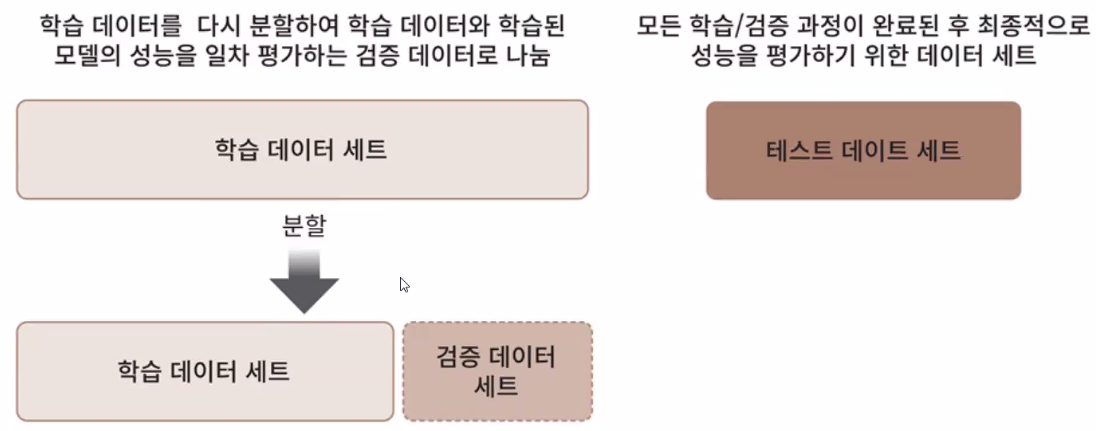

부적합한 데이터 선별로 인한 문제점
- ML은 데이터에 기반하고, 
- 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 
- ML에 영향을 미치는 다양한 요소를 가지고 있음
- 특정 ML 알고리즘에 최적으로 동작할 수 있도록
- 데이터를 선별해서 학습한다면
- 실제 데이터 양식과는 많은 차이가 있을 것이고
- 결국 성능 저하로 이어질 것임

문제점 개선 ---> 교차 검증을 이용해 더 다양한 학습 평가 수행


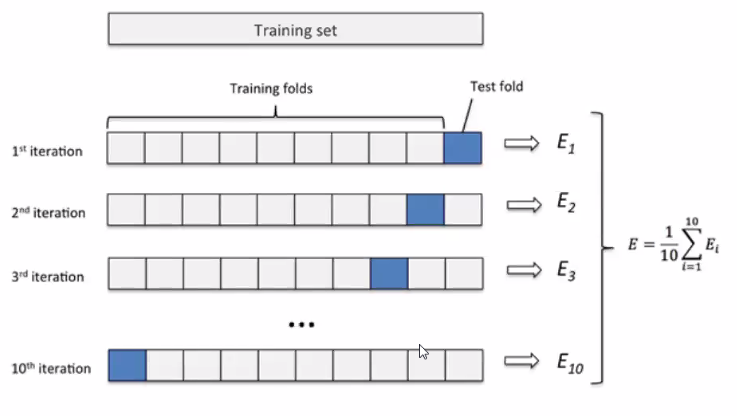

### 교차 검증 방법
- k 폴드 교차 검증
- Stratified K 폴드 교차 검증
- 가장 보편적으로 사용되는 교차 검증 기법
- 5-폴드 교차 검증

**K 폴드 교차 검증 프로세스 구현을 위한 사이킷런 클래스**

(1) KFold 클래스 : 폴드 세트로 분리하는 객체 생성
- kfold = KFold(n_splits=5)

(2) split() 메소드 : 폴드 데이터 세트로 분리
- kfold.split(features)
- 각 폴드마다  
    학습용, 검증용, 테스트 데이터 추출  
    학습용 및 예측 수행  
    정확도 측정  
    
(3) 최종 평균 정확도 계산


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


In [16]:
iris = load_iris()
features = iris.data
label = iris.target

print(features.shape) # 150개 데이터 피처 4개
print('붓꽃 데이터 세트 크기:',features.shape[0])


(150, 4)
붓꽃 데이터 세트 크기: 150


In [17]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []

In [18]:
# 폴드 별 학습용, 검증용 데이터 세트의 행 인덱스 확인
kfold.split(features)

<generator object _BaseKFold.split at 0x00000184120C2C10>

In [19]:
for train_index, test_index in kfold.split(features):
    print(train_index, test_index)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 1

In [20]:
n_iter = 0
# kfoLe 객체의 splite() 호출하면 폴드별 학습용, 검증용 테스트의 행 인덱스를 array로 반환

# 5번 반복 : KFold(n_splits=5)
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]  # X_train.shape : (120, 4) 
    test_size = X_test.shape[0]    # X_test.shape : (30, 4)
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)


# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


DecisionTreeClassifier(random_state=156)


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


DecisionTreeClassifier(random_state=156)


#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


DecisionTreeClassifier(random_state=156)


#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]


DecisionTreeClassifier(random_state=156)


#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


DecisionTreeClassifier(random_state=156)


#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### Stratified K 폴드 교차 검증
- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식


- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- 특정 레이블값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우친 경우
- 학습 데이터와 검증 데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
- (stratify : 계층화하다)

- KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반형하지 못하는 문제 해결


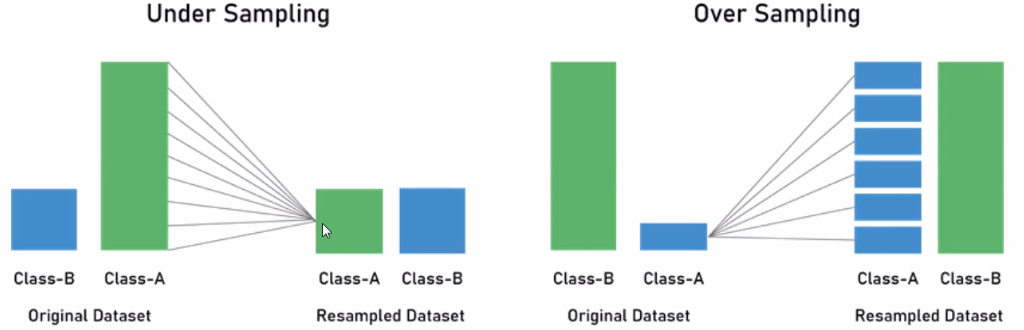

Stratified K 폴드 교차 검증 방법이 사용되는 예
- 대출 사기 데이터 예측 

- 데이터 세트 : 1억 건  
- feature 수십 개  
- 대출 사기 여부를 뜻하는 레이블   
   - 대출 사기 : 1  
   - 정상 대출 : 0  
- 대출 사기 건수 : 약 1000 건 (전체의 0.00001 %)


- 먼저 k폴드 문제점 확인
- Stratified k폴드로 개선
- 레이블 값의 분포도 확인

In [21]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris_df['label'].value_counts()
# 각 품종마다 50개의 데이터 수집

0    50
1    50
2    50
Name: label, dtype: int64

In [23]:
# 3개 폴드를 구성
kfold = KFold(n_splits=3)

n=0
for train_index, test_index in kfold.split(iris_df):
    n += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("[교차검증: %d]" %(n))
    print("  학습용 : \n", label_train.value_counts())
    print("  검증용 : \n", label_test.value_counts())

[교차검증: 1]
  학습용 : 
 1    50
2    50
Name: label, dtype: int64
  검증용 : 
 0    50
Name: label, dtype: int64
[교차검증: 2]
  학습용 : 
 0    50
2    50
Name: label, dtype: int64
  검증용 : 
 1    50
Name: label, dtype: int64
[교차검증: 3]
  학습용 : 
 0    50
1    50
Name: label, dtype: int64
  검증용 : 
 2    50
Name: label, dtype: int64


In [24]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=156)

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []

### kfold (3) 으로 교차 검증

In [25]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
# 3번 반복
for train_index, test_index in kfold.split(iris_df):  # iris_df['label'] 인자로 넣어도 결과 동일
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]  # X_train.shape : (120, 4) 
    test_size = X_test.shape[0]    # X_test.shape : (30, 4)
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)    
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


DecisionTreeClassifier(random_state=156)


#1 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


DecisionTreeClassifier(random_state=156)


#2 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


DecisionTreeClassifier(random_state=156)


#3 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.0


### 위 코드 결과의 문제점

- 학습하지 않은 데이터를 검증 데이터로 사용
- 원할한 학습과 예측이 어려움
- 검증 정확도는 0


StratifiedKFold 클래스
- 원본 데이터의 레이블 분포를 고려한 뒤 이 분포와 동일하게 학습과 검증데이터 세트를 분배

- KFold 사용법과 거의 비슷
- 차이점
  - 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에
  - split() 메서드에 인자로 피처 데이터 세트뿐 아니라 
  - 레이블 데이터 세트도 반드시 필요하다는 것


In [26]:
from sklearn.model_selection import StratifiedKFold

In [27]:
skf = StratifiedKFold(n_splits=3) #폴드 세트 3개
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [28]:
# StratifiedKFold를 이용해 붓꽃 데이터 교차 검증

dt_clf = DecisionTreeClassifier(random_state=156)

# 3개의 폴드 세트로 분리하는 StratifiedKFold 객체 생성
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


DecisionTreeClassifier(random_state=156)


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]


DecisionTreeClassifier(random_state=156)


#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]


DecisionTreeClassifier(random_state=156)


#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


Stratified K 폴드의 경우
- 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로
- 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해서 교차 검증해야 함
- 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 함
- 회귀(Regression)에서는 Stratified K 폴드 지원되지 않음
    - 이유 : 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에
    - 결정값별로 분포를 정하는 의미가 없기 때문

#### 교차 검증 과정
1. 폴드 세트 설정
2. for 문에서 반복적으로 학습 및 검증 데이터 추출 학습/예측 수행
3. 폴드 세트별로 예측 성능을 평균해서 최종 성능 평가

### 교차검증을 간편하게 : cross_val_score() 함수
- 1~3 단계의 교차 검증 과정을 한꺼번에 수행
- 내부에서 Estimatior를 학습 (fit), 예측(Predict), 평가(Evaluation) 시켜줌
- 간단하게 교차 검증 수행 가능

### 주요 파라미터

- estimator : Classifier 또는 Regressor (분류 또는 회귀)
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표 
- cv : 교차 검증 폴드 수


- scoring 파라미터로 지정된 평가지표로 평가를 한 후 결과값을 배열로 반환
- 일반적으로 평가 결과값의 평균을 평가 수치로 사용

### 붓꽃 자료를 3개 폴드로 분할항여 학습 및 검즘

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

In [35]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표는 정확도(accuracy), 교차검증 세트는 3개

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)

print('교차 검증별 정확도 : ', scores)
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


### cross_validate
- cross_val_score()하고 비슷한 함수
- 여러개의 평가지표를 반환
- 학습 데이터에 대한 평가지표와 학습 수행시간도 제공

## 교차검증과 하이퍼파라미터 튜닝을 한번에

하이퍼 파라미터 (Hyper parameter)
- 모델링할 때 사용자가 직접 세팅해주는 값
- 여러 하이퍼 파라미터를 순차적으로 변경하면서  
- 최고 성능을 가지는 파라미터 조합을 찾을 수 있음
- max_depth, min_samples_split, iteration 등

- 머신러닝 알고리즘을 구성하는 주요 구성 요소로
- 이 값들을 조정해 알고리즘의 예측 성능을 개선할 수 있음

#### 사이킷런의 GridSearchCV 클래스
- Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서
    - 최적의 파라미터를 편리하게 도출할 수 있는 방법 제공  
    -(Grid는 격자라는 의미 : 촘촘하게 파라미터를 입력하면서 테스트 하는 방식)
- 파라미터의 집합을 만들어서 전달하면 순차적으로 모든 경우를 적용 => 최적화 진행

**GridSearchCV 클래스 생성자의 주요 파라미터**

- estimator : classifier, regressor, peipeline


- param_grid : key + 리스트 값을 가지는 딕셔너리 (estimator 튜닝을 위한 하이퍼 파라미터 )
     - key: 파라미터명, 리스트값:파라미터 값
     
     
- scoring : 예측 성능을 측정할 평가 방법 
     - 성능 평가 지표를 지정하는 문자열
     - 예: 정확도인 경우 'accuracy'
     
     
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수


- refit : 최적의 하이퍼 파라미터를 찾은 뒤 
        - 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 여부
     - 디폴트 : True


In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


In [56]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)

In [57]:
# DecisionTreeClassifier 객체 생성
dtree = DecisionTreeClassifier()

In [61]:
# 하이퍼 파라미터 설정
# parameter 들은 dict 형태로 설정
# key : [값]
parameters = {'max_depth' : [1,2,3], # 몇 개 층까지 내려가는지
              'min_samples_split': [2,3]} # 몇 개 층까지 내려가는지

min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
- min_samples_split=4로 설정하는 경우
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음


트리 깊이도 줄어서 더 간결한 결정 트리 생성


경우의 수
(1 2), (1 3),(2 2), (2 3), (3 2), (3 3) => 6가지 

In [62]:
# 하이퍼 파라미터 집합을 사용해서 학습
# 3개의 train, test set fold로 나누어서 학습 및 테스트 수행하도록 설정

grid_dtree = GridSearchCV(dtree, param_grid=parameters, 
                          cv=3, refit=True, return_train_score=True)
# 위의 경우에 수 6번에 cv 교차검증 3번 총 18번
grid_dtree.fit(X_train, y_train) # 학습 데이터 세트 사용


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             return_train_score=True)

In [63]:
# cv_result 결과반환 => 딕셔너리 형태
#df로 변환한 후 확인
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000527,4.275145e-04,0.000326,0.000461,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
1,0.000000,0.000000e+00,0.000322,0.000455,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5,0.7000,0.7000,0.7000,0.700000,1.110223e-16
2,0.000000,0.000000e+00,0.000000,0.000000,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
3,0.000656,4.638558e-04,0.000000,0.000000,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3,0.9750,0.9375,0.9625,0.958333,1.559024e-02
4,0.000997,2.287521e-05,0.000000,0.000000,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02
5,0.000997,6.743496e-07,0.000000,0.000000,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1,0.9875,0.9625,0.9875,0.979167,1.178511e-02


In [64]:
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [65]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00052675, 0.        , 0.        , 0.00065581, 0.00099746,
        0.0009973 ]),
 'std_fit_time': array([4.27514467e-04, 0.00000000e+00, 0.00000000e+00, 4.63855844e-04,
        2.28752104e-05, 6.74349576e-07]),
 'mean_score_time': array([0.00032576, 0.00032163, 0.        , 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([0.00046069, 0.00045485, 0.        , 0.        , 0.        ,
        0.        ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'ma

In [70]:
## 위의 결과에 의해서 가장 좋은 성능의 모델로 이미 학습이 된 상태 => best_estimator_ 속성에 저당되어 있음
estimator =grid_dtree.best_estimator_
print(estimator)
pred = estimator.predict(X_test)
print(pred)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

DecisionTreeClassifier(max_depth=3)
[1 2 1 0 0 1 1 1 1 2 2 1 1 0 0 2 1 0 2 0 2 2 1 1 1 1 0 0 2 2]
테스트 데이터 세트 정확도: 0.9667


### 일반적으로 머신러닝 모델 적용 방법
- 학습 데이터를 GridSearchCV를 이용
- 최적의 하이퍼 파라미터 튜닝을 수행
- 별도의 테스트 세트에서 이를 평가하는 방식